In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
import pandas_datareader as pdr
import fix_yahoo_finance as yf
#from pandas_datareader import data

In [4]:
sns.set_style('darkgrid')

In [5]:
#Collecting amazon data 
data_amz = yf.download('AMZN','2010-01-02','2020-01-01')
data_amz.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


In [7]:
data_amz['Year'] = data_amz.index.year
data_amz['Month'] = data_amz.index.month

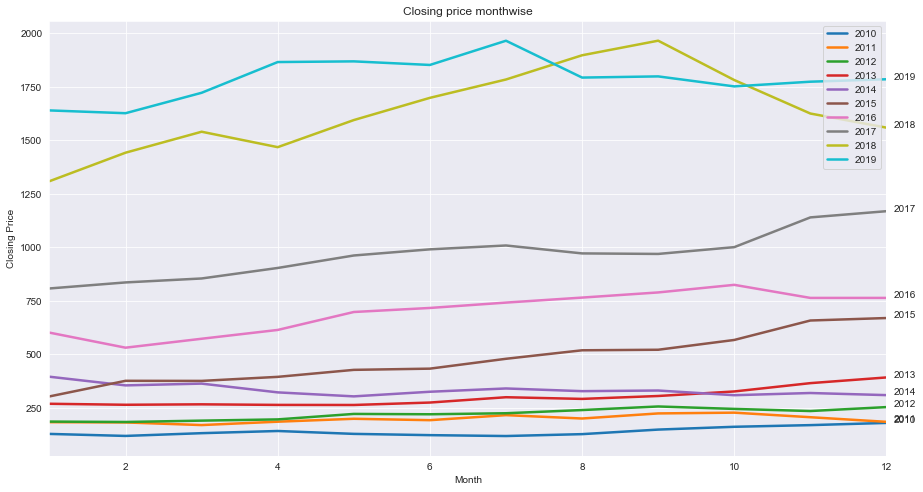

In [8]:
plt.figure(figsize=(15,8))
plt.title("Closing price monthwise")
plt.xlabel('Month')
plt.ylabel('Closing Price')
for i in data_amz.Year.unique():
    temp = data_amz[data_amz['Year']==i][['Adj Close','Month']]
    temp.groupby('Month')['Adj Close'].mean().plot(label=i,linewidth=2.5)
    plt.text(x=12.1,y=temp.groupby('Month')['Adj Close'].mean()[12],s=i)
    plt.legend(loc='best')
plt.show()
    

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [10]:
def plot_data_amz(data_amz,title='Time Series Plot'):
    plt.figure(figsize=(16,4))
    plt.plot(data_amz)
    plt.title(title)
    plt.xlabel("Price")
    plt.ylabel('Date')
    fig, ax = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data_amz, ax=ax[0,0]);
    plot_pacf(data_amz, ax=ax[0,1]);
    sns.distplot(data_amz, ax=ax[0,2])
    ax[0,2].set_title("Probability Distribution")

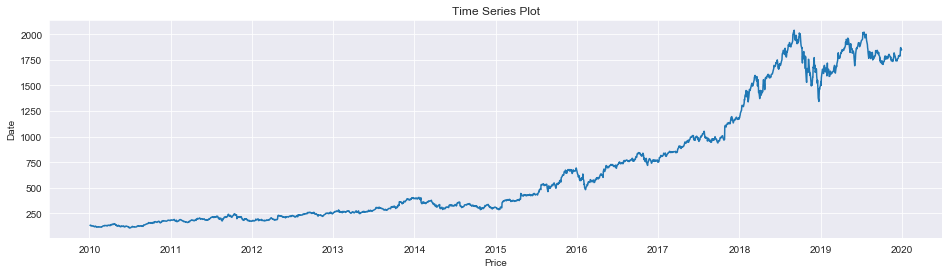

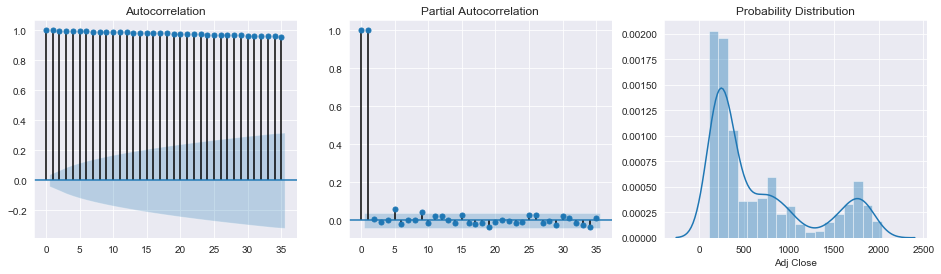

In [11]:
plot_data_amz(data_amz['Adj Close'])

In [12]:
train_data = data_amz.loc[:'2018-12-31']
train_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000,2018,12
2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800,2018,12
2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000,2018,12
2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000,2018,12
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500,2018,12


In [13]:
test_data = data_amz.loc['2019-01-02':]
test_data

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100,2019,1
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600,2019,1
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600,2019,1
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200,2019,1
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400,2019,1
2019-01-09,1652.979980,1667.800049,1641.400024,1659.420044,1659.420044,6348800,2019,1
2019-01-10,1641.010010,1663.250000,1621.619995,1656.219971,1656.219971,6507700,2019,1
2019-01-11,1640.550049,1660.290039,1636.219971,1640.560059,1640.560059,4686200,2019,1
2019-01-14,1615.000000,1648.199951,1595.150024,1617.209961,1617.209961,6005900,2019,1


In [14]:
def plot_seasonal_decompose(data, model):
    decomposition = seasonal_decompose(data,model=model,freq=24)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(15,10))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout() 
    plt.show()
    

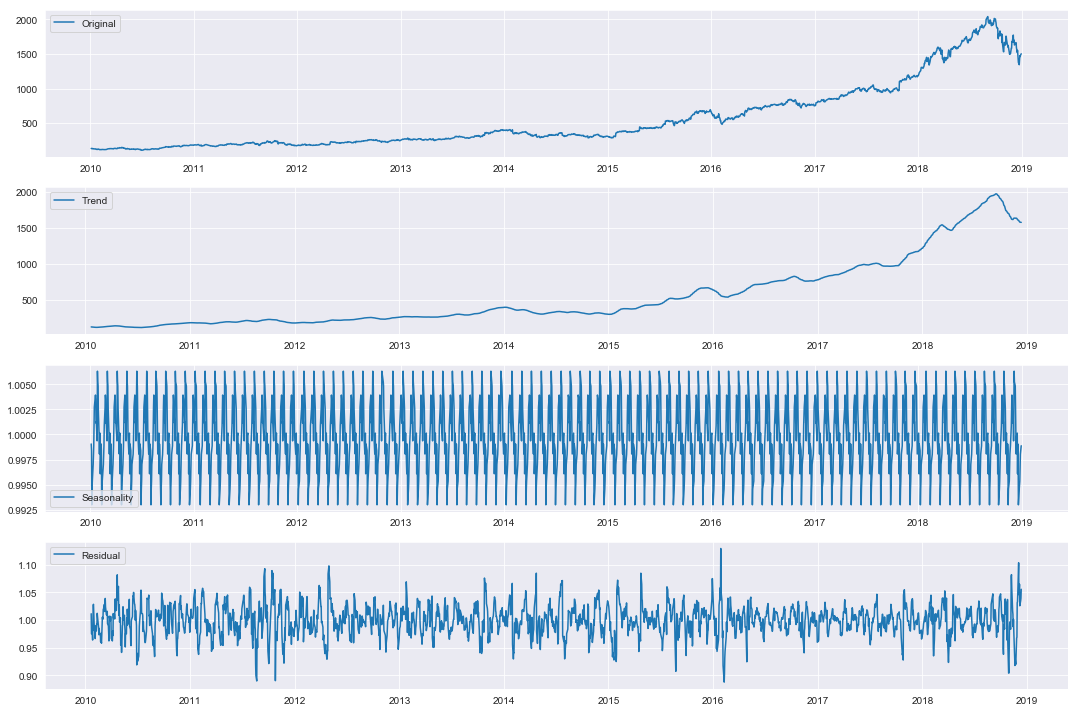

In [15]:
plot_seasonal_decompose(train_data['Adj Close'], 'multiplicative')

In [16]:
def stationary_test(data):
    mean =data.rolling(12).mean()
    std = data.rolling(12).std()
    plt.figure(figsize=(15,5))
    plt.plot(data, label= "Original", color = 'black')
    plt.plot(mean, label = "Mean", color = 'Red')
    plt.plot(std, label= 'Variance', color='Blue')
    plt.legend(loc='best')
    print("The result of Dicky-Fuller Test:")
    result = adfuller(data, autolag='AIC')
    output = pd.Series(result[:4],index=['Test Statistic', 'p-value', 'No of lags', 'No of observation'])
    for key, values in result[4].items():
        output['Critical values(%s)'%key] = values
    print(output)

The result of Dicky-Fuller Test:
Test Statistic             0.160767
p-value                    0.969973
No of lags                26.000000
No of observation       2237.000000
Critical values(1%)       -3.433277
Critical values(5%)       -2.862833
Critical values(10%)      -2.567458
dtype: float64


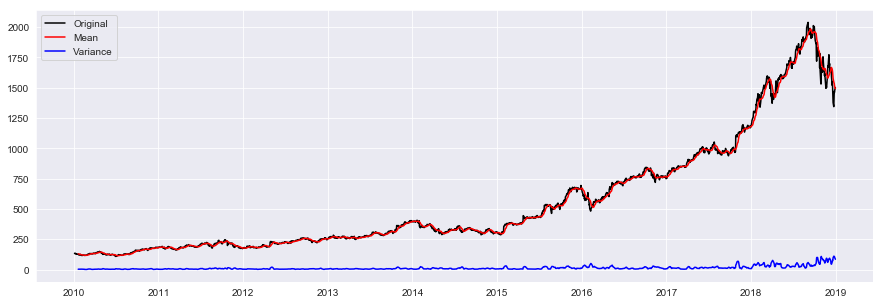

In [17]:
stationary_test(train_data['Adj Close'])

In [18]:
#Differencing the timeseries
data_amz_log = np.log(train_data['Adj Close'])

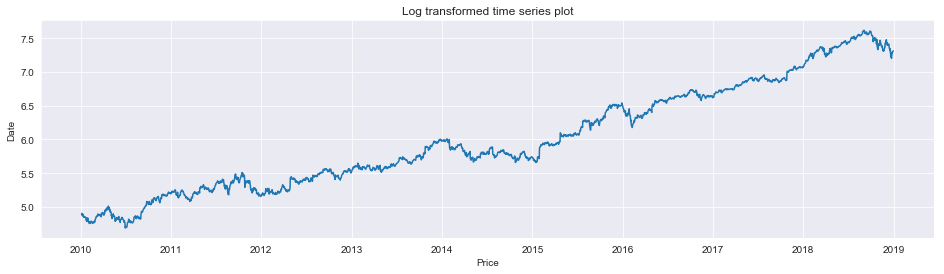

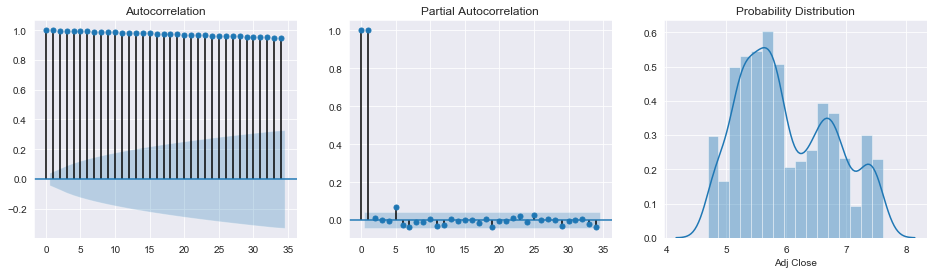

In [19]:
plot_data_amz(data_amz_log, "Log transformed time series plot")

The result of Dicky-Fuller Test:
Test Statistic            -0.274164
p-value                    0.929085
No of lags                 0.000000
No of observation       2263.000000
Critical values(1%)       -3.433243
Critical values(5%)       -2.862818
Critical values(10%)      -2.567450
dtype: float64


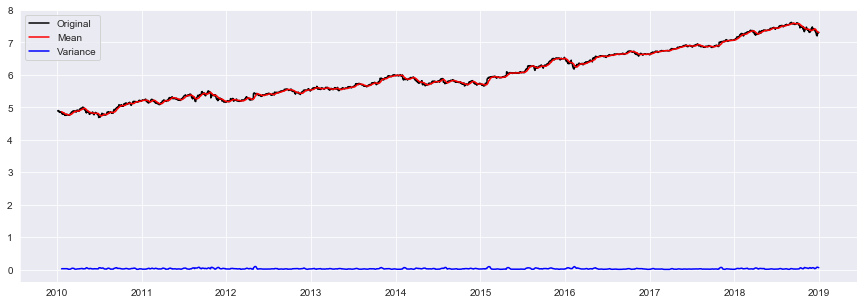

In [20]:
stationary_test(data_amz_log)

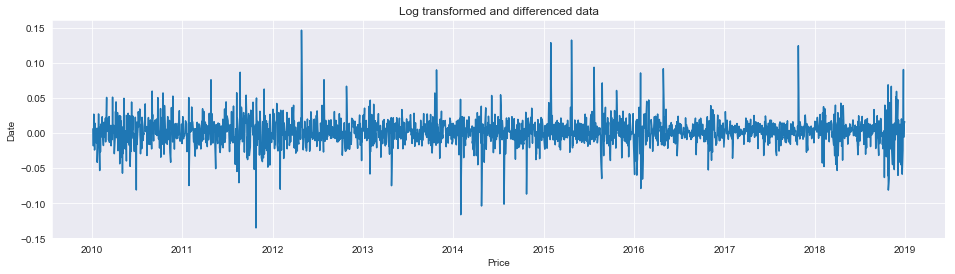

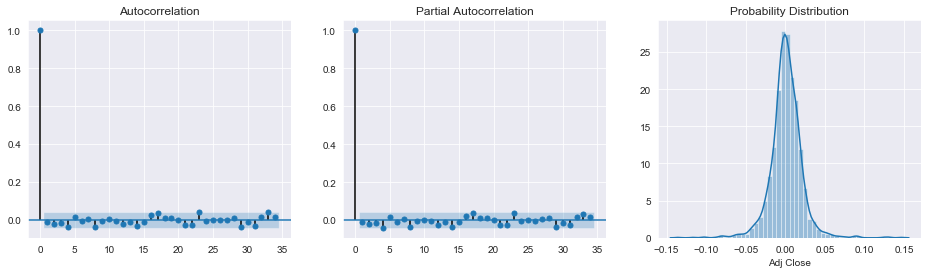

In [21]:
logged_diffed_data = data_amz_log.diff()[1:]
plot_data_amz(logged_diffed_data, 'Log transformed and differenced data')

The result of Dicky-Fuller Test:
Test Statistic           -48.071182
p-value                    0.000000
No of lags                 0.000000
No of observation       2262.000000
Critical values(1%)       -3.433244
Critical values(5%)       -2.862819
Critical values(10%)      -2.567451
dtype: float64


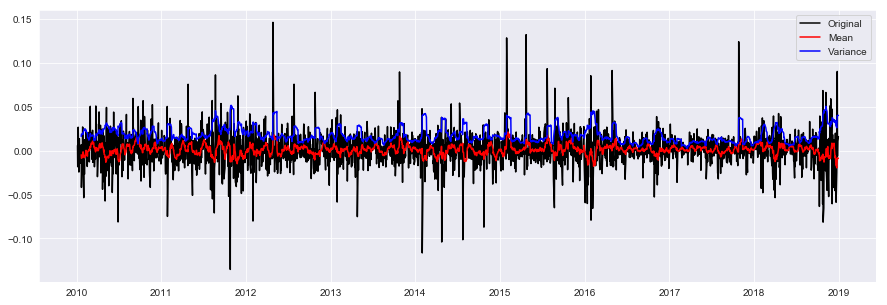

In [22]:
stationary_test(logged_diffed_data)

In [23]:
from scipy.stats import shapiro
def shapiro_normality_test(data):
    p_value = shapiro(data)[1]
    if p_value >= 0.05:
        print("Data follows normal distribution: X~N"+ str((np.round(np.mean(data),3), np.round(np.std(data),3))))
        print("Shapiro test p_value={}".format(np.round(p_value,3)))
    else:
        print("Data failed shapiro normality test with p_value={}".format(np.round(p_value,3)))

In [24]:
shapiro_normality_test(logged_diffed_data)

Data failed shapiro normality test with p_value=0.0


In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model = ARIMA(data_amz_log, order=(1, 1, 0), freq=data_amz_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 2263
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5650.410
Method:                       css-mle   S.D. of innovations              0.020
Date:                Fri, 20 Mar 2020   AIC                         -11294.820
Time:                        20:28:13   BIC                         -11277.646
Sample:                             1   HQIC                        -11288.553
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0011      0.000      2.579      0.010       0.000       0.002
ar.L1.D.Adj Close    -0.0112      0.021     -0.534      0.593      -0.052       0.030
                        

In [27]:
fc, se, conf = results_ARIMA.forecast(252, alpha=0.05)  # 95% conf
forecast_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:,0],index=test_data.index)
upper_series = pd.Series(conf[:,1],index=test_data.index)

In [28]:
forecast_series

Date
2019-01-02    7.315432
2019-01-03    7.316502
2019-01-04    7.317571
2019-01-07    7.318639
2019-01-08    7.319707
2019-01-09    7.320775
2019-01-10    7.321843
2019-01-11    7.322911
2019-01-14    7.323979
2019-01-15    7.325048
2019-01-16    7.326116
2019-01-17    7.327184
2019-01-18    7.328252
2019-01-22    7.329320
2019-01-23    7.330388
2019-01-24    7.331456
2019-01-25    7.332525
2019-01-28    7.333593
2019-01-29    7.334661
2019-01-30    7.335729
2019-01-31    7.336797
2019-02-01    7.337865
2019-02-04    7.338933
2019-02-05    7.340002
2019-02-06    7.341070
2019-02-07    7.342138
2019-02-08    7.343206
2019-02-11    7.344274
2019-02-12    7.345342
2019-02-13    7.346410
                ...   
2019-11-18    7.552562
2019-11-19    7.553630
2019-11-20    7.554698
2019-11-21    7.555767
2019-11-22    7.556835
2019-11-25    7.557903
2019-11-26    7.558971
2019-11-27    7.560039
2019-11-29    7.561107
2019-12-02    7.562175
2019-12-03    7.563244
2019-12-04    7.564312
2019-1

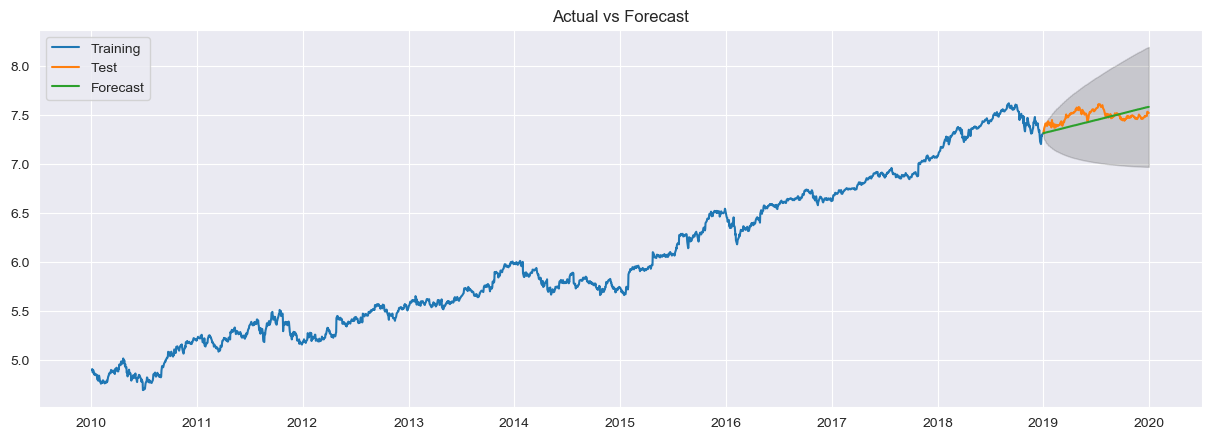

In [29]:
#Plot
plt.figure(figsize=(15,5),dpi=100)
plt.plot(np.log(train_data['Adj Close']), label='Training')
plt.plot(np.log(test_data['Adj Close']), label ='Test')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=0.15)
plt.title('Actual vs Forecast')
plt.legend(loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
rms = np.sqrt(mean_squared_error(np.log(test_data['Close']),forecast_series))
print("RMSE: ", rms)

RMSE:  0.08877974093088262
